In [2]:
import pandas as pd 
import datetime
import math

defaultValue = 0
dates = ["2019-12-01", "2022-12-31"]
startDate, endDate = [datetime.datetime.strptime(_, "%Y-%m-%d") for _ in dates]

# account for all months 
monthList = [datetime.datetime.strptime('%2.2d-%2.2d' % (year, month), '%Y-%m').strftime('%B-%Y')
    for year in range(startDate.year, endDate.year+1)
    for month in range(startDate.month if year == startDate.year else 1,
                       endDate.month+1 if year == endDate.year else 13)]

monthValues = {}.fromkeys(monthList, defaultValue)
monthResearchValues = {}.fromkeys(monthList, defaultValue)

# data of important COVID-related events 
events = ["event_1|December-2019", "event_2|January-2020", "event_3a|March-2020", "event_3b|April-2020", "event_4a|May-2020", "event_4b|June-2020", "event_5|July-2020", "event_6|August-2020", "event_7|December-2020"]
eventValues = {}.fromkeys(events, defaultValue)

# dateMarker1 = datetime.datetime.strptime("12-2019", "%m-%Y")
# alpha_betaMarker = datetime.datetime.strptime("12-18-2020", "%m-%d-%Y")

# dates variants listed as variant of concern (VOC) 
variants = [
    "alpha_beta|December-2020",
    "gamma|January-2021",
    "delta|May-2021" ,
    "omicron|October-2021",
    "alpha_beta_gamma_2|March-2022",
    "delta_2|June-2022"
]
variantValues = {}.fromkeys(variants, defaultValue)

markerCounters = []
dates = pd.read_csv('LitQuery_2.csv')
# only count Covid papers
dates = dates[dates['Pandemic'].isin(['COVID-19', 'COVID-19, Zika virus'])]

print(len(dates))

850


In [3]:
from dateutil.relativedelta import relativedelta

# read each date and starting checking within ranges for Publication Dates
for index, row in dates.iterrows():
    print(index,"/", dates.shape[0], end='\r')
    publicationDate = str(row['New Publication Date'])
    researchStartDate = str(row['Start Dates of Research'])
    researchEndDate = str(row['End Dates of Research'])

    if(publicationDate != 'nan'):
        publicationDate = datetime.datetime.strptime(publicationDate, "%m/%d/%Y")
        for month in monthList:
            monthTransformed = datetime.datetime.strptime(month, "%B-%Y")
            if(publicationDate.month == monthTransformed.month and publicationDate.year == monthTransformed.year):
                #  count++
                monthValues[month] += 1


        

    if(researchEndDate != 'nan' and researchStartDate != 'nan'):
        researchStartDate = datetime.datetime.strptime(researchStartDate, "%m/%d/%Y")
        researchEndDate = datetime.datetime.strptime(researchEndDate, "%m/%d/%Y")
        researchStartExt = researchStartDate + relativedelta(month=3)
        researchEndExt = researchEndDate - relativedelta(month=3)
        
        for variant in variants:
            variantDate = variant.split('|')[1]
            variantDateTransformed = datetime.datetime.strptime(variantDate, "%B-%Y")

            if((researchStartDate<variantDateTransformed<researchStartExt) or researchEndExt<variantDateTransformed<researchEndDate):
                variantValues[variant] += 1
        

        for event in events:
            eventDate = event.split('|')[1]
            eventDateTransformed = datetime.datetime.strptime(eventDate, "%B-%Y")
            # if date is within range dateMarker:
            # if(publicationDate.month == eventDateTransformed.month and publicationDate.year == eventDateTransformed.year):
            if((researchStartDate<eventDateTransformed<researchStartExt) or researchEndExt<eventDateTransformed<researchEndDate):
                #  count++
                eventValues[event] += 1
            
        for month in monthList:
            monthResearchTransformed = datetime.datetime.strptime(month, "%B-%Y")
            if((researchStartDate<monthResearchTransformed<researchStartExt) or researchEndExt<monthResearchTransformed<researchEndDate):
                #  count++
                monthResearchValues[month] += 1



print(eventValues, monthValues, variantValues, monthResearchValues)

{'event_1|December-2019': 0, 'event_2|January-2020': 0, 'event_3a|March-2020': 42, 'event_3b|April-2020': 187, 'event_4a|May-2020': 139, 'event_4b|June-2020': 105, 'event_5|July-2020': 68, 'event_6|August-2020': 55, 'event_7|December-2020': 10} {'December-2019': 0, 'January-2020': 0, 'February-2020': 0, 'March-2020': 7, 'April-2020': 7, 'May-2020': 18, 'June-2020': 13, 'July-2020': 22, 'August-2020': 27, 'September-2020': 17, 'October-2020': 22, 'November-2020': 13, 'December-2020': 22, 'January-2021': 20, 'February-2021': 19, 'March-2021': 33, 'April-2021': 15, 'May-2021': 36, 'June-2021': 27, 'July-2021': 28, 'August-2021': 24, 'September-2021': 18, 'October-2021': 15, 'November-2021': 45, 'December-2021': 28, 'January-2022': 38, 'February-2022': 38, 'March-2022': 31, 'April-2022': 23, 'May-2022': 28, 'June-2022': 20, 'July-2022': 18, 'August-2022': 23, 'September-2022': 16, 'October-2022': 26, 'November-2022': 21, 'December-2022': 17} {'alpha_beta|December-2020': 10, 'gamma|January-

In [11]:
from datetime import datetime
newCases = pd.read_csv("covid-data.csv")
newCases = dict(zip(newCases['Dates'], newCases['New Cases']))

edittedEventValues = {}
for key in eventValues:
    edittedEventValues[key.split('|')[1]] = eventValues[key]

edittedVariantValues = {}
for key in variantValues:
    new_key = datetime.strptime(key.split('|')[1], "%B-%Y").strftime("%B-%Y")
    edittedVariantValues[new_key] = variantValues[key]

df = pd.DataFrame({'Month Values':pd.Series(monthValues), 'Month Researched Values':pd.Series(monthResearchValues), 'Event Values':pd.Series(edittedEventValues), 'Variant Values':pd.Series(edittedVariantValues), 'New Cases':pd.Series(newCases) }, index=monthValues.keys())

df = df.fillna('---')
df

,Month Values,Month Researched Values,Event Values,Variant Values,New Cases
December-2019,0,0,0.0,---,---
January-2020,0,0,0.0,---,37493.0
February-2020,0,77,---,---,304360.0
March-2020,7,42,42.0,---,3519291.0
April-2020,7,187,187.0,---,10416385.0
May-2020,18,139,139.0,---,11795981.0
June-2020,13,105,105.0,---,17387383.0
July-2020,22,68,68.0,---,28648171.0
August-2020,27,55,55.0,---,32244607.0
September-2020,17,48,---,---,35022752.0


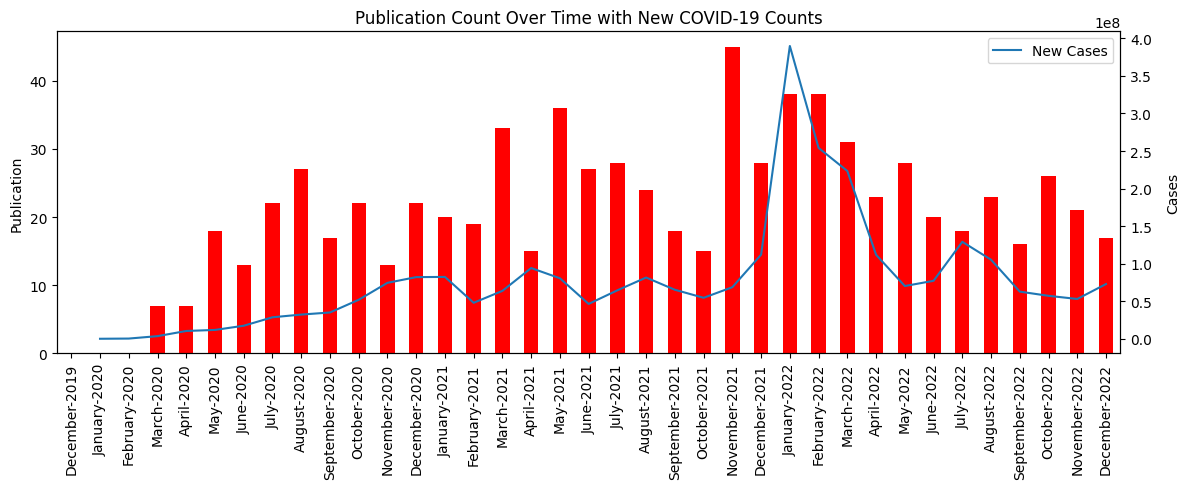

In [5]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [12.00, 5]
plt.rcParams["figure.autolayout"] = True

plt.title("Publication Count Over Time with New COVID-19 Counts")


ax1 = plt.subplot()
b1 = df['Month Values'].plot(kind='bar', color='red', ylabel='Publication')
ax2 = ax1.twinx()
l1 = df['New Cases'].plot(kind='line', label='New Cases')


# using format string '{:.0f}' here but you can choose others
# plt.gca().set_yticklabels(['{:,.2f}'.format(x) for x in df['New Cases'].to_list()])




plt.xlabel("Time", labelpad=10)
plt.ylabel("Cases", labelpad=10)
plt.legend()
plt.show()






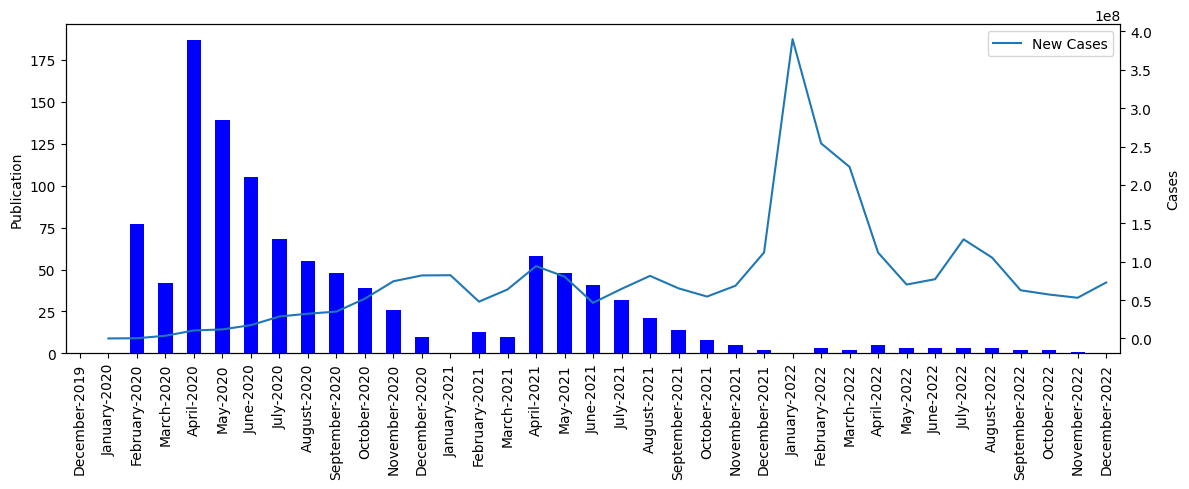

In [6]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [12.00, 5]
plt.rcParams["figure.autolayout"] = True


ax1 = plt.subplot()
b1 = df['Month Researched Values'].plot(kind='bar', color='blue', ylabel='Publication')
ax2 = ax1.twinx()
l1 = df['New Cases'].plot(kind='line', label='New Cases')


# using format string '{:.0f}' here but you can choose others
# plt.gca().set_yticklabels(['{:,.2f}'.format(x) for x in df['New Cases'].to_list()])




plt.xlabel("Time", labelpad=10)
plt.ylabel("Cases", labelpad=10)
plt.legend()
plt.show()

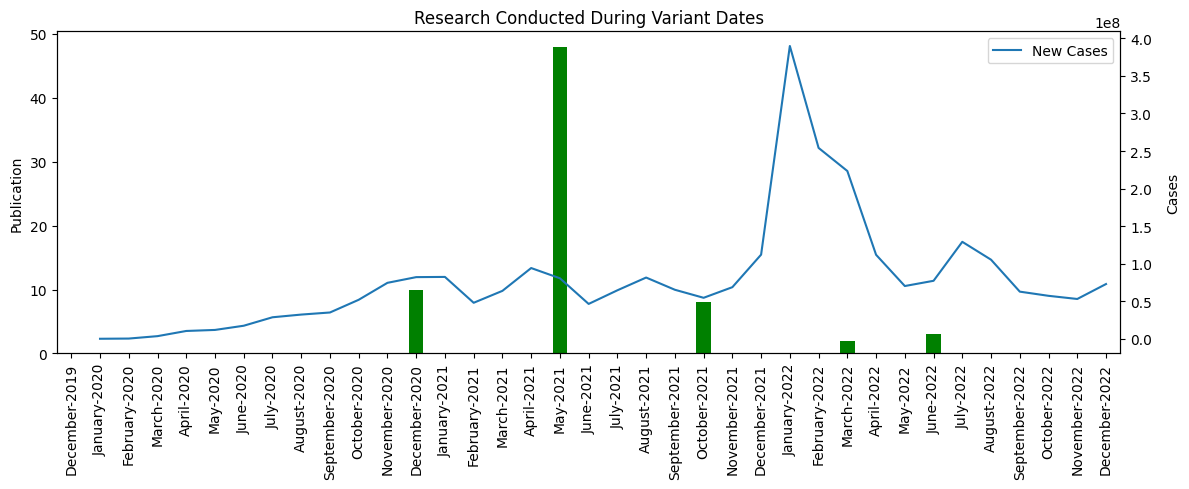

In [9]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [12.00, 5]
plt.rcParams["figure.autolayout"] = True

plt.title("Research Conducted During Variant Dates")


ax1 = plt.subplot()
b1 = df['Variant Values'].plot(kind='bar', color='green', ylabel='Publication')
ax2 = ax1.twinx()
l1 = df['New Cases'].plot(kind='line', label='New Cases')


# using format string '{:.0f}' here but you can choose others
# plt.gca().set_yticklabels(['{:,.2f}'.format(x) for x in df['New Cases'].to_list()])




plt.xlabel("Time", labelpad=10)
plt.ylabel("Cases", labelpad=10)
plt.legend()
plt.show()


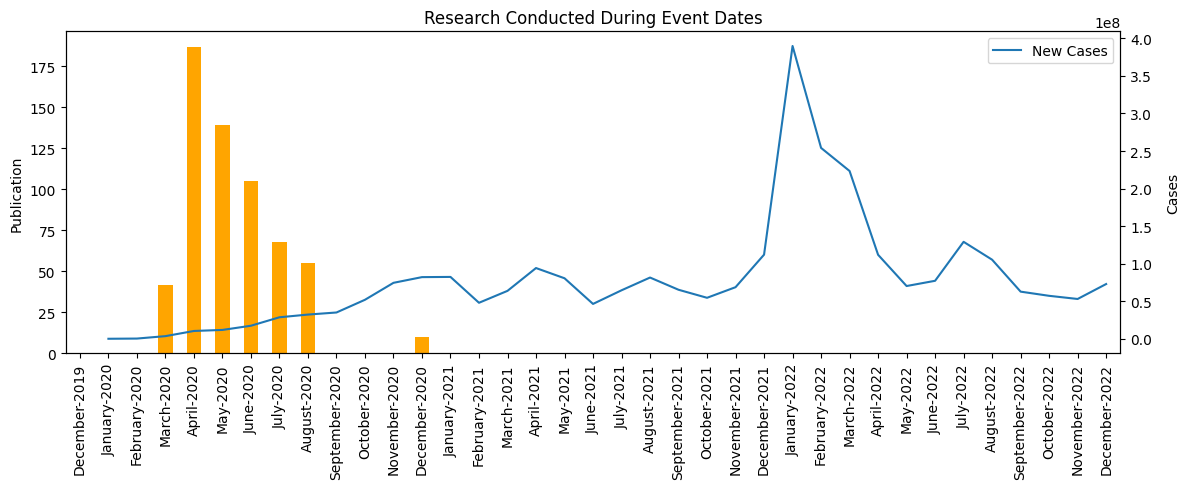

In [10]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [12.00, 5]
plt.rcParams["figure.autolayout"] = True

plt.title("Research Conducted During Event Dates")


ax1 = plt.subplot()
b1 = df['Event Values'].plot(kind='bar', color='orange', ylabel='Publication')
ax2 = ax1.twinx()
l1 = df['New Cases'].plot(kind='line', label='New Cases')


# using format string '{:.0f}' here but you can choose others
# plt.gca().set_yticklabels(['{:,.2f}'.format(x) for x in df['New Cases'].to_list()])




plt.xlabel("Time", labelpad=10)
plt.ylabel("Cases", labelpad=10)
plt.legend()
plt.show()